# PHD Simulation 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from time import time
import imp
import base, main, parameters
imp.reload(main)
imp.reload(parameters)
imp.reload(base)
%matplotlib inline

##### import PHD objects

In [2]:
from main import PHD, PHD_bootstrap

##### import gaussian densities f, f_pdf, g, g_pdf and their constants 

In [3]:
from parameters import*

# 1-  Simple simulation: 

### 1 - generate data 

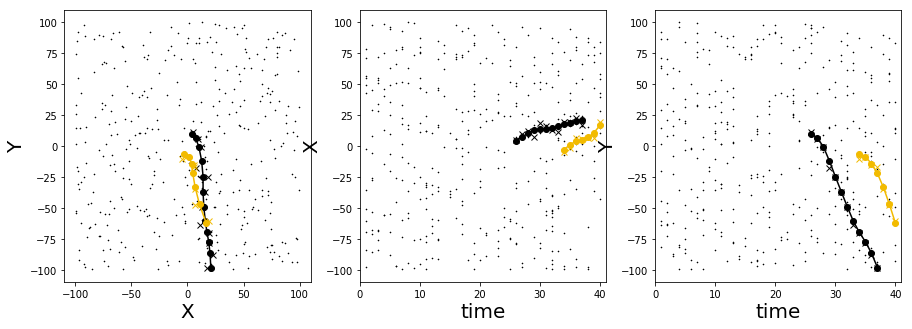

In [7]:
phd = PHD_bootstrap(f=f, f_pdf=f_pdf, g=g, g_pdf=g_pdf, e=0.99, r=10, poisson_coef = 0.05, n_time_steps = 40)
phd.generate()
phd.plot_true(with_clutter=1)

### 2 - predict

prediction time: 1.8381474018096924


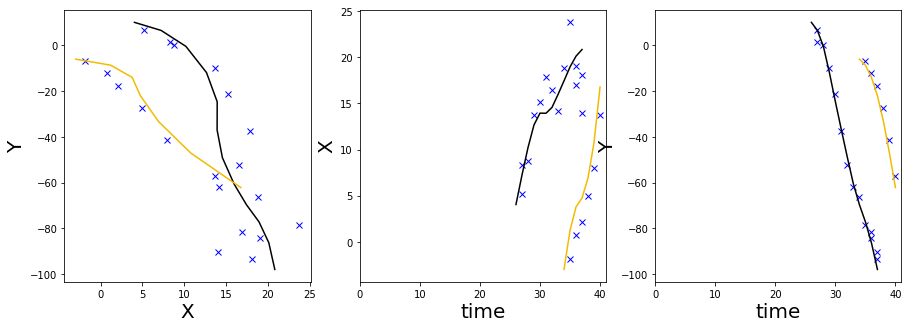

In [8]:
t = time()
phd.predict(rho=200, J=50, n_jobs=-1)
print("prediction time:", time()-t)
phd.plot_true_predictions()

### 3- plot distances

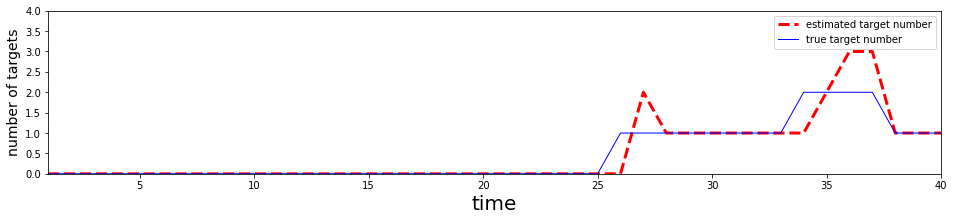

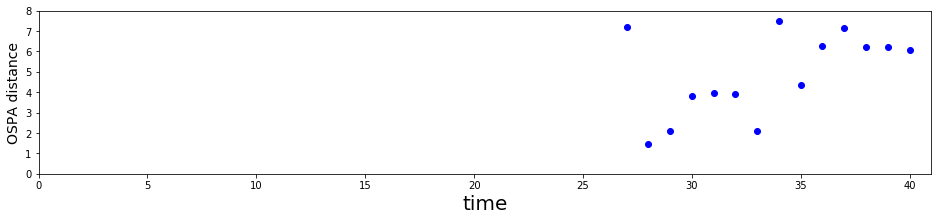

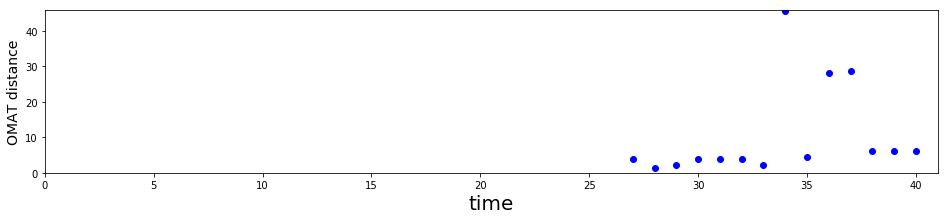

In [9]:
phd.wasserstein()

## 2 - add clutter to the same data and predict: 
<font color="red"> careful ! once you add clutter to the data, you can't retrieve the original data back ! </font> 

Total clutter is 40


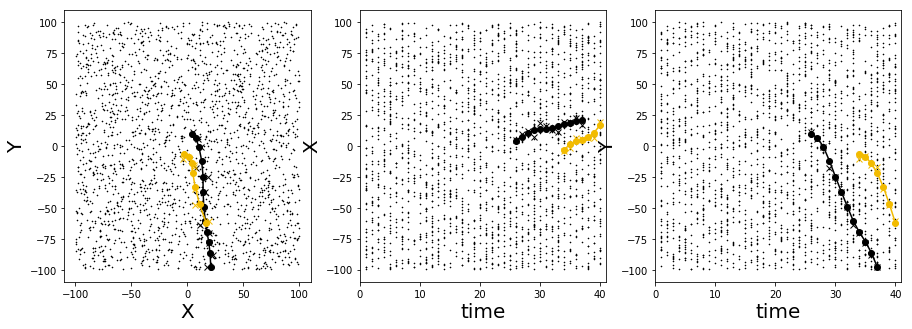

In [10]:
phd.add_clutter(r=30)
phd.plot_true(with_clutter=True)

prediction time with clutter 40: 8.143908739089966


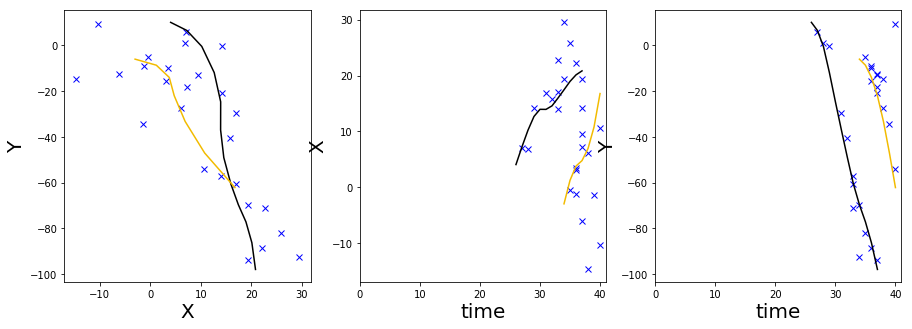

In [11]:
t = time()
phd.predict(rho=200, J=50, n_jobs=-1)
print("prediction time with clutter {}:".format(phd.r), time()-t)
phd.plot_true_predictions()

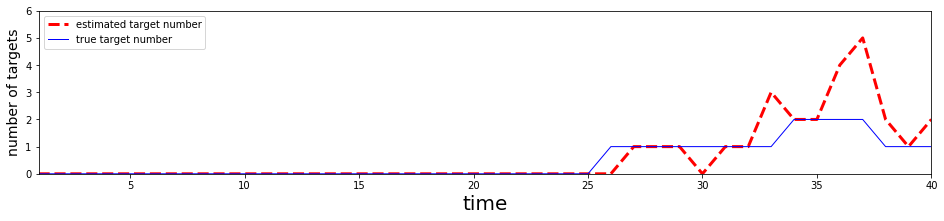

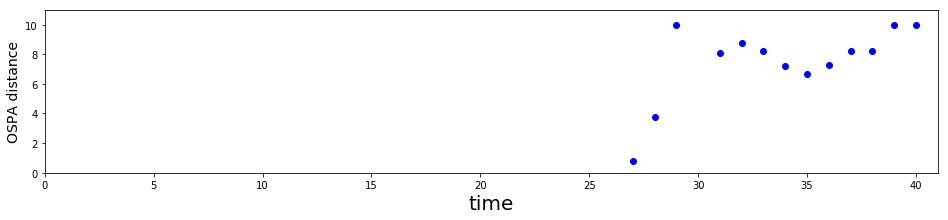

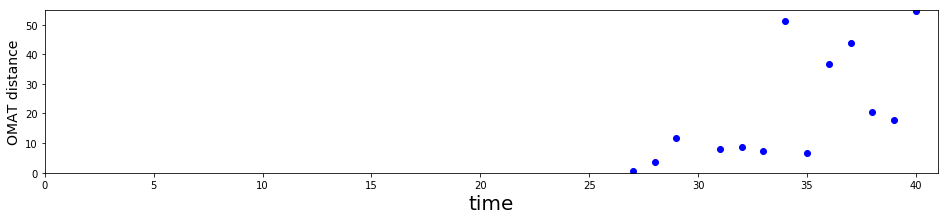

In [12]:
phd.wasserstein()

We increment the number of particles: 

prediction time with clutter 40: 23.052225351333618


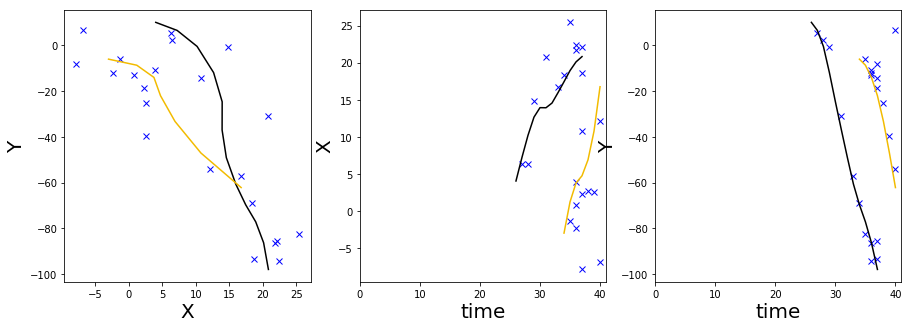

In [13]:
t = time()
phd.predict(rho=500, J=200, n_jobs=-1)
print("prediction time with clutter {}:".format(phd.r), time()-t)
phd.plot_true_predictions()

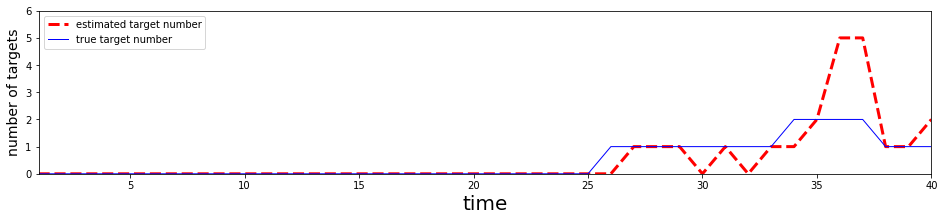

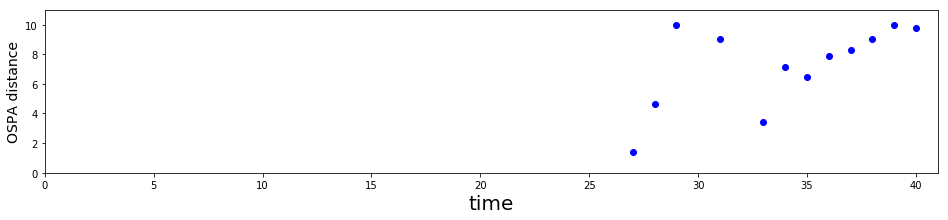

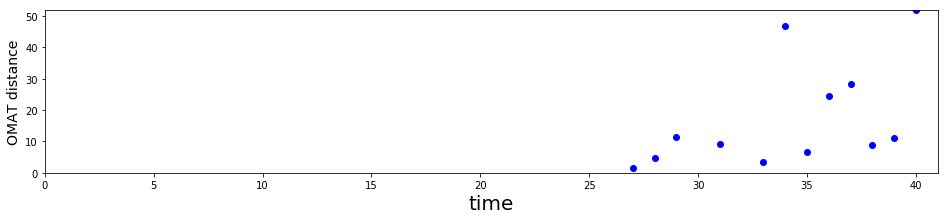

In [14]:
phd.wasserstein()